## In this notebook we demonstrate the use of the package Achedmy on two different reaction systems and compare it to mass action kinetics:

In [1]:
include("../src/Achedmy/Achedmy.jl")

Main.Achedmy

In [2]:
using .Achedmy
using Pkg
using PyPlot
using Catalyst
using LinearAlgebra
using DifferentialEquations
# using Revise

In [3]:
#Parameters simulation
tstart= 0.
tmax = 2.
atol = 1e-5
rtol = 1e-3

0.001

### Define the reaction system $A+A \rightarrow A$ and the defaults or initialization using Catalyst:

In [4]:
rs_aaa = @reaction_network AAA begin
    @species A(t)= 4. /3
    @parameters k1A = 1. k2A = 1. k3 = 1. 
  (k3), A+A --> A
  (k2A,k1A), A <--> 0 
end

Model AAA
States (1):
  A(t) [defaults to 1.33333]
Parameters (3):
  k1A [defaults to 1.0]
  k2A [defaults to 1.0]
  k3 [defaults to 1.0]

#### Define the reaction structure in the form more convinient to us:

In [5]:
structure_aaa = ReactionStructure(rs_aaa)

ReactionStructure{Int64, Vector{Float64}, Matrix{Int64}, Vector{Float64}, Vector{Any}, Vector{Vector{Int64}}, Vector{Any}, Vector{Vector{Int64}}, Vector{Float64}}(1, 1, 3, [1.0], [1.0], [1.0], [1;;], [2;;], [1.3333333333333333], Any[[[0], [1], [2]]], [[0], [1], [2]], Any[[[0], [1], [2]]], [[0], [1], [2]], [0.0])

#### Define the varianbles for the reaction which are updated in place when we run the dynamics:

In [6]:
variables_aaa = ReactionVariables(structure_aaa,"single")

ReactionVariables("single", [1.0;;;], [1.3333333333333333;;], [0.0;;;], [1.3333333333333333;;;], [0.0;;;], [0.0;;;], [0.0;;;])

#### Run the dynamics using kbsolve:

In [7]:
sol_aaaSBR = solve_dynamics!(structure_aaa,variables_aaa,atol,rtol,tmax,tstart);

MethodError: MethodError: no method matching solve_dynamics!(::ReactionStructure{Int64, Vector{Float64}, Matrix{Int64}, Vector{Float64}, Vector{Any}, Vector{Vector{Int64}}, Vector{Any}, Vector{Vector{Int64}}, Vector{Float64}}, ::ReactionVariables, ::Float64, ::Float64, ::Float64, ::Float64)
The function `solve_dynamics!` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  solve_dynamics!(::Any, ::Any; selfEnergy, tmax, tstart, atol, rtol, k_max, dtini, dtmax, qmax, qmin, γ, kmax_vie)
   @ Main.Achedmy ~/Work/code/achedmy/src/Achedmy/Dynamics.jl:3


In [11]:
plot_all_moddiag(variables_aaa,sol_aaaSBR)

UndefVarError: UndefVarError: `plot_all_moddiag` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

#### Compare with Mass action or Mean field:

In [9]:
oprob_aaa = solve(ODEProblem(rs_aaa,[],(tstart,tmax),combinatoric_ratelaws=false),saveat = sol_aaaSBR.t)
sol_aaaMAK = [oprob_aaa.u[i][1] for i in 1:length(oprob_aaa.t)]

123-element Vector{Float64}:
 1.3333333333333333
 1.3333312222260902
 1.3333206668059154
 1.3332982753729319
 1.333270063565802
 1.3331798052039
 1.3329720872977813
 1.3325435399615084
 1.3318898946367013
 1.3306918476176677
 1.329024590183538
 1.3264739141084632
 1.3232261184749499
 ⋮
 0.6299149313882064
 0.6291902920833498
 0.6285068093149142
 0.6278624696878682
 0.6272552812236614
 0.6266832801545487
 0.6261445377448965
 0.6256371671353792
 0.62515933020643
 0.6247092444577552
 0.6242851899011429
 0.6242450051844356

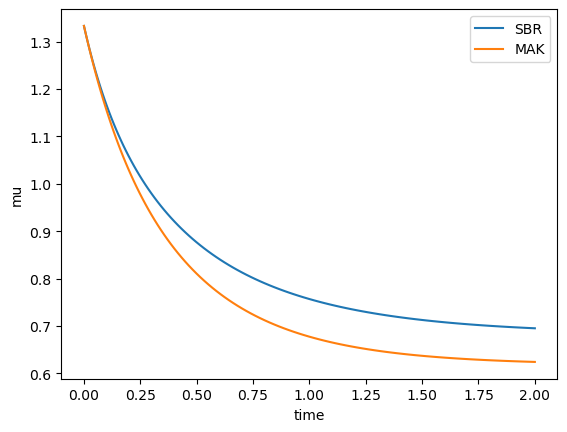

PyObject <matplotlib.legend.Legend object at 0x7f020f3d4650>

In [10]:
plot(sol_aaaSBR.t,variables_aaa.μ[1,:],label="SBR")
plot(oprob_aaa.t,sol_aaaMAK,label="MAK")
ylabel("mu")
xlabel("time")
legend()

### Define the $A+B \rightarrow C$ reaction:

In [11]:
rs_abc = @reaction_network ABC begin
    @species A(t) = 4. /3 B(t) = 2.0 C(t) = 1.0
    @parameters k1A = 4 k1B = 4 k1C = 3 k2A = 3 k2B = 2 k2C = 3 k3 = 1.
  (k3), A+B --> C
  (k2A,k1A), A <--> 0
  (k2B,k1B), B <--> 0
  (k2C,k1C), C <--> 0  
end

Model ABC
States (3):
  A(t) [defaults to 1.33333]
  B(t) [defaults to 2.0]
  C(t) [defaults to 1.0]
Parameters (7):
  k1A [defaults to 4]
  k1B [defaults to 4]
  k1C [defaults to 3]
  k2A [defaults to 3]
  k2B [defaults to 2]
  k2C [defaults to 3]
⋮

In [12]:
structure_abc = ReactionStructure(rs_abc)
variables_abc = ReactionVariables(structure_abc,"single")
sol_abcSBR    = solve_dynamics!(structure_abc,variables_abc,atol,rtol,tmax,tstart,"SBR-mix");

t: 0.0
t: 1.0e-6
t: 5.999999999999999e-6
t: 1.6864687963672578e-5
t: 3.0642564501344665e-5
t: 7.338079094497726e-5
t: 0.00017161779169591504
t: 0.000371783566360389
t: 0.0006758278114652881
t: 0.0012299860913578802
t: 0.002000340518064036
t: 0.003177216174493502
t: 0.0046791886806422205
t: 0.006722288162596488
t: 0.009172108887699204
t: 0.012240516127284518
t: 0.015755325034202104
t: 0.019907296573997455
t: 0.02450783589091823
t: 0.029720729211824663
t: 0.03535953423524923
t: 0.04156202190882891
t: 0.04815561701019028
t: 0.05525600686740643
t: 0.06270960273025972
t: 0.0706146214411012
t: 0.0788369961031673
t: 0.08746171067991007
t: 0.09637225463691548
t: 0.10564388405123598
t: 0.11486315788827849
t: 0.12425445936841086
t: 0.1338093057698426
t: 0.14348585013488407
t: 0.15331829007654652
t: 0.16330464698312921
t: 0.1734424743326897
t: 0.18373760195742617
t: 0.1941902283125172
t: 0.2048006958394187
t: 0.2155699214699944
t: 0.22649778670881943
t: 0.23758403520203572
t: 0.2488282632214148
t

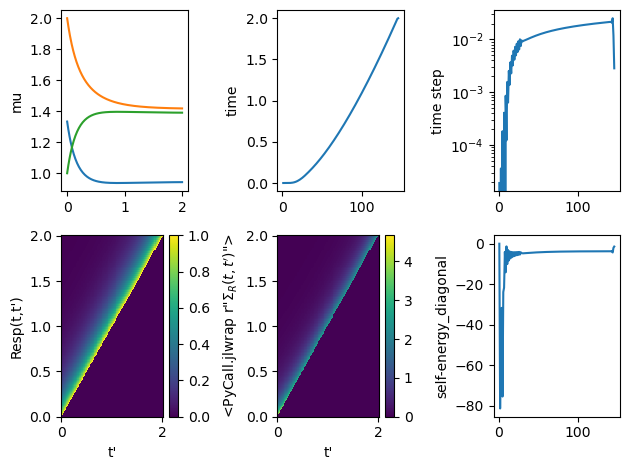

In [15]:
plot_all_moddiag(variables_abc,sol_abcSBR)

In [14]:
function plot_all_moddiag(rxn_variables,solution)
    
    #Plots the diagonal values separately for the self-energy
    #This equalizes the scale difference so that the values are better visible
    
    subplot(231)
    for i in 1:length(rxn_variables.μ[:,1])
        PyPlot.plot(solution.t, rxn_variables.μ[i,:])
    end
    #PyPlot.plot(solution.t, rxn_variables.μ[1,:])
    #PyPlot.plot(solution.t, rxn_variables.μ[2,:])
    #PyPlot.plot(solution.t, rxn_variables.μ[3,:])
    ylabel("mu")

    subplot(232)
    PyPlot.plot(1:length(solution.t),solution.t)
    ylabel("time")

    subplot(233)
    PyPlot.plot(1:length(solution.t),solution.w[length(solution.t)])
    ylabel("time step")
    yscale("log")

    subplot(234)
    #imshow(rxn_variables.R[1,:,:])
    pcolor(solution.t,solution.t,rxn_variables.R[1,:,:],shading="auto")
    colorbar()
    #colorbar(shrink=0.6)
    ylabel("Resp(t,t')")
    xlabel("t'")
    
    temp = deepcopy(rxn_variables.Σ_R[1,1:length(solution.t),1:length(solution.t)])
    
    for i in 1:length(solution.t)
        #temp[i,i] *= solution.w[length(solution.t)][i]
        temp[i,i] = 0
    end
    
    subplot(235)
    #imshow(temp)
    pcolor(solution.t,solution.t,temp,shading="auto")
    #colorbar(shrink=0.6)
    colorbar()
    ylabel(r"$\Sigma_R (t,t')$")
    xlabel("t'")
    
    subplot(236)
    PyPlot.plot(1:length(solution.t),diag(rxn_variables.Σ_R[1,1:length(solution.t),1:length(solution.t)].*abs.(solution.w[length(solution.t)])))
    #PyPlot.plot(1:length(solution.t),diag(rxn_variables.Σ_R[1,1:length(solution.t),1:length(solution.t)]))

    ylabel("self-energy_diagonal")
    
    tight_layout()
    
end

plot_all_moddiag (generic function with 1 method)

In [21]:
for i in 1:3
    temp1    = zeros(Int,3)
    temp1[i] = 1
    print([1,0,0] .+ 2*temp1)
end

[3, 0, 0][1, 2, 0][1, 0, 2]

In [41]:
?transpose

search: transpose transpose! Transpose copy_transpose! NoiseTransport



```
transpose(A)
```

Lazy transpose. Mutating the returned object should appropriately mutate `A`. Often, but not always, yields `Transpose(A)`, where `Transpose` is a lazy transpose wrapper. Note that this operation is recursive.

This operation is intended for linear algebra usage - for general data manipulation see [`permutedims`](@ref Base.permutedims), which is non-recursive.

# Examples

```jldoctest
julia> A = [3 2; 0 0]
2×2 Matrix{Int64}:
 3  2
 0  0

julia> B = transpose(A)
2×2 transpose(::Matrix{Int64}) with eltype Int64:
 3  0
 2  0

julia> B isa Transpose
true

julia> transpose(B) === A # the transpose of a transpose unwraps the parent
true

julia> Transpose(B) # however, the constructor always wraps its argument
2×2 transpose(transpose(::Matrix{Int64})) with eltype Int64:
 3  2
 0  0

julia> B[1,2] = 4; # modifying B will modify A automatically

julia> A
2×2 Matrix{Int64}:
 3  2
 4  0
```

For complex matrices, the `adjoint` operation is equivalent to a conjugate-transpose.

```jldoctest
julia> A = reshape([Complex(x, x) for x in 1:4], 2, 2)
2×2 Matrix{Complex{Int64}}:
 1+1im  3+3im
 2+2im  4+4im

julia> adjoint(A) == conj(transpose(A))
true
```

The `transpose` of an `AbstractVector` is a row-vector:

```jldoctest
julia> v = [1,2,3]
3-element Vector{Int64}:
 1
 2
 3

julia> transpose(v) # returns a row-vector
1×3 transpose(::Vector{Int64}) with eltype Int64:
 1  2  3

julia> transpose(v) * v # compute the dot product
14
```

For a matrix of matrices, the individual blocks are recursively operated on:

```jldoctest
julia> C = [1 3; 2 4]
2×2 Matrix{Int64}:
 1  3
 2  4

julia> D = reshape([C, 2C, 3C, 4C], 2, 2) # construct a block matrix
2×2 Matrix{Matrix{Int64}}:
 [1 3; 2 4]  [3 9; 6 12]
 [2 6; 4 8]  [4 12; 8 16]

julia> transpose(D) # blocks are recursively transposed
2×2 transpose(::Matrix{Matrix{Int64}}) with eltype Transpose{Int64, Matrix{Int64}}:
 [1 2; 3 4]   [2 4; 6 8]
 [3 6; 9 12]  [4 8; 12 16]
```

---

```
transpose(x::MatrixElem{T}) where T <: RingElement
```

Return the transpose of the given matrix.

# Examples

```jldoctest; setup = :(using AbstractAlgebra)
julia> R, t = polynomial_ring(QQ, "t")
(Univariate polynomial ring in t over rationals, t)

julia> S = matrix_space(R, 3, 3)
Matrix space of 3 rows and 3 columns
  over univariate polynomial ring in t over rationals

julia> A = S([t + 1 t R(1); t^2 t t; R(-2) t + 2 t^2 + t + 1])
[t + 1       t             1]
[  t^2       t             t]
[   -2   t + 2   t^2 + t + 1]

julia> B = transpose(A)
[t + 1   t^2            -2]
[    t     t         t + 2]
[    1     t   t^2 + t + 1]

```
